Missing values in 'total_graduates': 0


C:\Users\ishan\AppData\Local\Temp\ipykernel_17520\3409855483.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_graduates'].fillna(df['total_graduates'].median(), inplace=True)
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklea

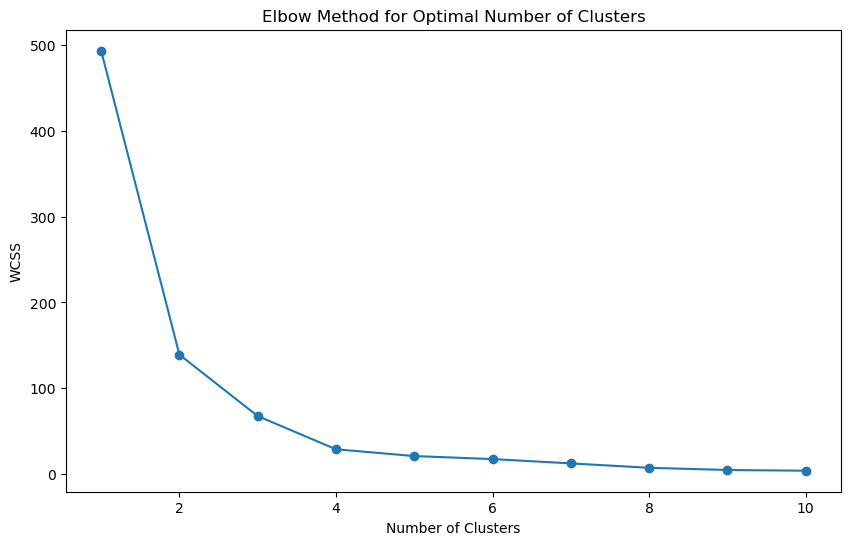

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\AppData\Local\Temp\ipykernel_17520\3409855483.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df_scaled)


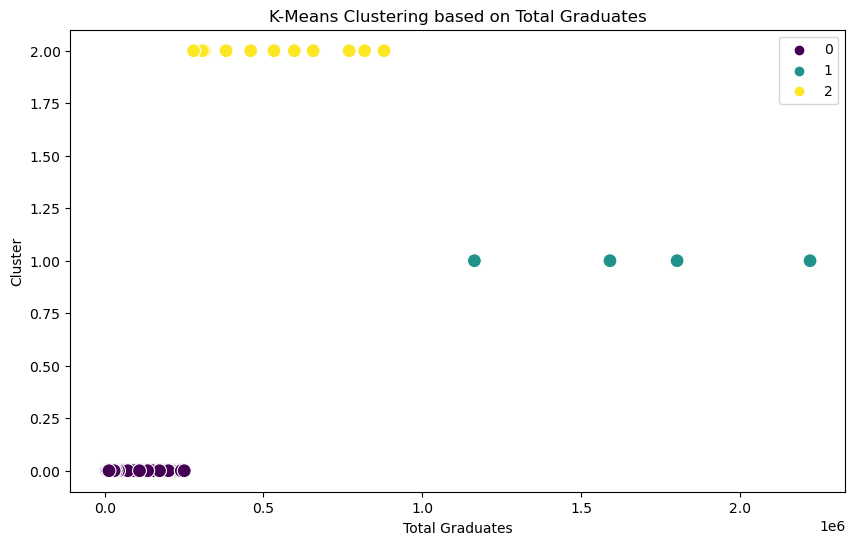

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Cities_r2.csv')

# Selecting only the 'total_graduates' column
df = data[['total_graduates']]

# Check for missing values
print("Missing values in 'total_graduates':", df['total_graduates'].isnull().sum())
# Fill missing values if any, for example using the median of the column
df['total_graduates'].fillna(df['total_graduates'].median(), inplace=True)

# Scaling the 'total_graduates' data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Applying K-Means Clustering

# Choosing the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow plot, choose the optimal number of clusters, e.g., k = 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_graduates', y='Cluster', data=df, hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering based on Total Graduates')
plt.xlabel('Total Graduates')
plt.ylabel('Cluster')
plt.legend()
plt.show()
